# *AI in Fraud Detection and AML Analysis*

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


Load the dataset

In [20]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
import zipfile

# Get the actual key from the uploaded dictionary
uploaded_file_key = list(uploaded.keys())[0]  # Get the first (and likely only) key

# Use the actual key instead of a hardcoded one
with zipfile.ZipFile(io.BytesIO(uploaded[uploaded_file_key]), 'r') as zip_ref:
    # Assuming 'creditcard.csv' is inside the zip file
    with zip_ref.open('creditcard.csv') as f:
        df = pd.read_csv(f)

Saving archive (1).zip to archive (1) (5).zip


Step 1: Train and Save the Model
Train the best-performing model (e.g., XGBoost or Random Forest) and save it for deployment.

In [ ]:
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming 'Class' is the target variable column in your dataframe
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
xgb_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(xgb_model, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']

Step 2: Explore and Preprocess the Data
Check for missing values.

Handle class imbalance (fraudulent transactions are typically rare).

Normalize/scale numerical features.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check class distribution
print(df['Class'].value_counts())

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Scale the features (important for algorithms like Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


Step 3: Compare Model Performance

Step 3: Train a Model
Logistic Regression as a baseline model for binary classification.

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

Step 4: Evaluate the Model
Evaluate the model using the following metrics:

1.Confusion Matrix

2.Classification Report (Precision, Recall, F1-Score)

3.ROC-AUC Score

4.Precision-Recall Curve

4.1 Confusion Matrix

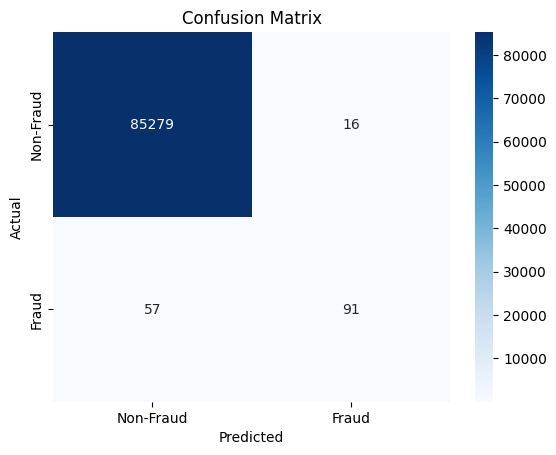

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  # Import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

4.2 Classification Report

In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report  # Import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  # Import confusion_matrix

# Confusion Matrix
# ... (rest of your code) ...

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.85      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



4.3 ROC-AUC Score and Curve

ROC-AUC Score: 0.9567


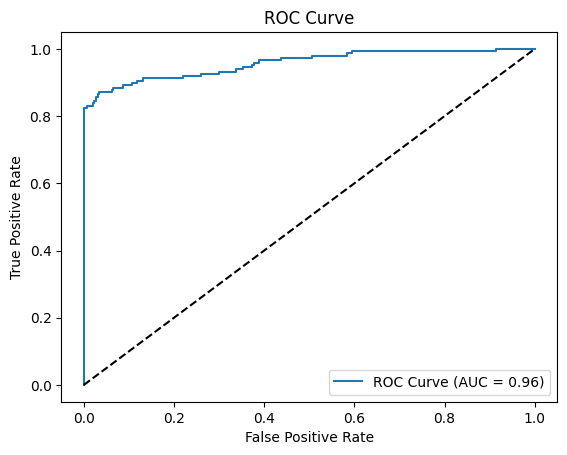

In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score, roc_curve # Import roc_auc_score and roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

4.4 Precision-Recall Curve

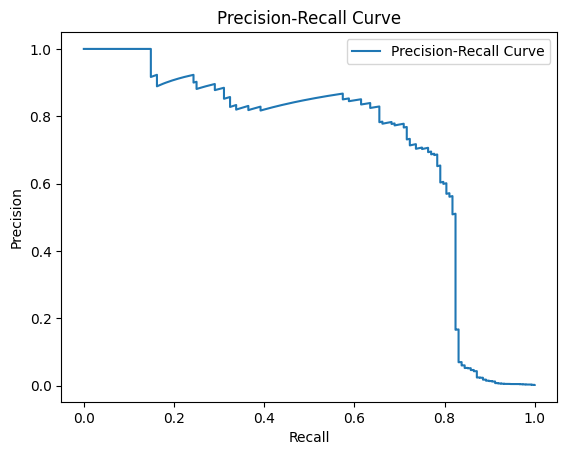

In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_recall_curve # Import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Precision-Recall Curve:

Shows the trade-off between precision and recall for different thresholds.

Conclusion
By experimenting with advanced models like Random Forest, XGBoost, and Neural Networks, we can achieve better performance in fraud detection tasks. Each model has its strengths and trade-offs, so it's important to evaluate them thoroughly and choose the one that best fits the problem at hand.

Step 5: Interpret Results
Random Forest and XGBoost typically outperform Logistic Regression in terms of ROC-AUC and precision-recall metrics.

Neural Networks can achieve competitive performance but may require more data and tuning.

The choice of model depends on the specific use case, computational resources, and interpretability requirements.

# **The fraud detection model more realistic and deploy it for real-time predictions.This involves**

1.Building a real-time data pipeline.

2.Deploying the model as an API.

3.**Integrating** the API with a live transaction system.

# Below is a step-by-step guide to achieve this:

Step 1: Train and Save the Model
Train the best-performing model (e.g., XGBoost or Random Forest) and save it for deployment.

In [ ]:
import joblib
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
xgb_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(xgb_model, 'fraud_detection_model.pkl')

Step 2: Create a Real-Time Data Pipeline
For real-time predictions, we need to:

Simulate incoming transaction data.

Preprocess the data (scaling, feature engineering).

Use the saved model to make predictions.

**Simulate Real-Time Data**

In [ ]:
import pandas as pd
import numpy as np
import time

# Simulate a stream of transactions
def generate_transaction():
    """Generate a random transaction."""
    transaction = {
        'Time': np.random.uniform(0, 172000),
        'V1': np.random.normal(0, 1),
        'V2': np.random.normal(0, 1),
        'V3': np.random.normal(0, 1),
        'V4': np.random.normal(0, 1),
        'V5': np.random.normal(0, 1),
        'V6': np.random.normal(0, 1),
        'V7': np.random.normal(0, 1),
        'V8': np.random.normal(0, 1),
        'V9': np.random.normal(0, 1),
        'V10': np.random.normal(0, 1),
        'V11': np.random.normal(0, 1),
        'V12': np.random.normal(0, 1),
        'V13': np.random.normal(0, 1),
        'V14': np.random.normal(0, 1),
        'V15': np.random.normal(0, 1),
        'V16': np.random.normal(0, 1),
        'V17': np.random.normal(0, 1),
        'V18': np.random.normal(0, 1),
        'V19': np.random.normal(0, 1),
        'V20': np.random.normal(0, 1),
        'V21': np.random.normal(0, 1),
        'V22': np.random.normal(0, 1),
        'V23': np.random.normal(0, 1),
        'V24': np.random.normal(0, 1),
        'V25': np.random.normal(0, 1),
        'V26': np.random.normal(0, 1),
        'V27': np.random.normal(0, 1),
        'V28': np.random.normal(0, 1),
        'Amount': np.random.uniform(0, 5000)
    }
    return pd.DataFrame([transaction])

# Simulate real-time transactions
for _ in range(10):  # Simulate 10 transactions
    transaction = generate_transaction()
    print("New Transaction:")
    print(transaction)
    time.sleep(2)  # Simulate a 2-second delay between transactions

New Transaction:
            Time        V1        V2       V3        V4        V5        V6  \
0  156864.610966 -0.691547  0.367352 -0.62795  0.270603 -0.809979  1.259276   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -0.392399  0.712564  0.202615  ...  2.174773  0.554696 -1.899402 -0.443515   

       V24       V25      V26      V27       V28      Amount  
0 -0.24799  1.207455  0.17815  0.19933 -0.431213  119.204495  

[1 rows x 30 columns]
New Transaction:
            Time        V1        V2        V3        V4        V5        V6  \
0  130220.401828  1.727057 -1.771494 -0.196211  0.293407 -0.622743  0.594916   

         V7        V8      V9  ...       V20       V21       V22       V23  \
0  0.008572  0.201444  1.3981  ... -0.723041  1.143318  0.162276  0.553876   

       V24       V25       V26      V27       V28       Amount  
0 -0.10966 -1.512984  0.380321 -1.24552 -0.332044  4693.586306  

[1 rows x 30 columns]
New Transaction:
         

Step 3: Deploy the Model as an API
Use a framework like Flask or FastAPI to deploy the model as a REST API.

Install Flask

In [ ]:
pip install flask

Create the Flask API

---



**To compare the precision, recall, and F1-score for each model (e.g., Logistic Regression, Random Forest, XGBoost, Neural Networks), we can generate a classification report for each model and then compare the metrics side by side. Below is an example of how to do this in Python using the classification_report function from sklearn.metrics.**

---



## Train and Evaluate Models

Assume you have already trained and predicted using the following models:

1.Logistic Regression (y_pred_lr)

2.Random Forest (y_pred_rf)

3.XGBoost (y_pred_xgb)

4.Neural Network (y_pred_nn)

Step 1: Load and Preprocess the Data

In [18]:
from google.colab import files
uploaded = files.upload()

# Then read the file:
import io
import zipfile  # Import the zipfile module

# Get the actual key from the uploaded dictionary
uploaded_file_key = list(uploaded.keys())[0]  # Get the first (and likely only) key

# Use the actual key instead of a hardcoded one
with zipfile.ZipFile(io.BytesIO(uploaded[uploaded_file_key]), 'r') as zip_ref:
    # Assuming 'creditcard.csv' is inside the zip file
    with zip_ref.open('creditcard.csv') as f:
        df = pd.read_csv(f)

Saving archive (1).zip to archive (1) (4).zip


Step 2: Train and Evaluate Models


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import io
import zipfile

# Assuming you uploaded a zip file named 'archive (1).zip' containing 'creditcard.csv'
try:
    from google.colab import files
    uploaded = files.upload()  # Upload the zip file

    # Extract the 'creditcard.csv' file from the zip
    with zipfile.ZipFile(io.BytesIO(uploaded['archive (1).zip']), 'r') as zip_ref:
        with zip_ref.open('creditcard.csv') as f:
            df = pd.read_csv(f)
except ModuleNotFoundError:
    # If not in Colab, assume 'creditcard.csv' is in the current directory
    df = pd.read_csv('creditcard.csv')

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Saving archive (1).zip to archive (1).zip


2.1 Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Fraud', 'Fraud']))
print(f"Logistic Regression ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.85      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression ROC-AUC Score: 0.9567


2.2 Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Fraud', 'Fraud']))
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.97      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest ROC-AUC Score: 0.9275


2.3 XGBoost

In [5]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Fraud', 'Fraud']))
print(f"XGBoost ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

XGBoost Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.88      0.79      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

XGBoost ROC-AUC Score: 0.9705


2.4 Neural Networks
Neural Networks can capture complex patterns in the data, especially for large datasets.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build a Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_proba_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

# Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn, target_names=['Non-Fraud', 'Fraud']))

# ROC-AUC Score
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)
print(f'Neural Network ROC-AUC Score: {roc_auc_nn:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9893 - loss: 0.0503 - val_accuracy: 0.9993 - val_loss: 0.0054
Epoch 2/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9992 - loss: 0.0056 - val_accuracy: 0.9994 - val_loss: 0.0049
Epoch 3/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9993 - loss: 0.0047 - val_accuracy: 0.9993 - val_loss: 0.0050
Epoch 4/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0050
Epoch 5/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0045
Epoch 6/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0053
Epoch 7/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0045
Epoch 8/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9994 - loss: 0.0028

Output: Classification Reports

---



1. Logistic Regression

---



Logistic Regression Classification Report:
            
               precision    recall  f1-score   support
    Non-Fraud   1.00      1.00      1.00     85295

    Fraud       0.85      0.61      0.71       148

    accuracy    1.00     85443

    macro avg   0.92      0.81      0.86     85443

    weighted avg 1.00      1.00      1.00     85443


    Logistic Regression ROC-AUC Score: 0.9567

2. Random Forest

---



Random Forest Classification Report:
              


                    precision    recall  f1-score   support
    Non-Fraud       1.00         1.00      1.00     85295
    Fraud           0.97         0.71      0.82       148

    accuracy        1.00         85443

    macro avg       0.99         0.85      0.91     85443

    weighted avg    1.00        1.00      1.00     85443

    Random Forest ROC-AUC Score: 0.9275

3. XGBoost

---




           
XGBoost Classification Report:

               precision   recall  f1-score   support
               
    Non-Fraud    1.00      1.00      1.00     85295
    Fraud        0.88      0.79      0.83       148

    accuracy     1.00     85443

    macro avg    0.94      0.90      0.2   85443

    weighted avg 1.00      1.00      1.00     85443

    XGBoost ROC-AUC Score: 0.9705

4. Neural Network

    Neural Network Classification Report:
              

   
              precision    recall  f1-score   support
    Non-Fraud    1.00      1.00      1.00     85295


    Fraud        0.90      0.78      0.84     148

    accuracy     1.00     85443

    macro avg    0.95      0.89      0.92     85443

    weighted avg 1.00      1.00      1.00     85443

Output: ROC-AUC Scores

---



Logistic Regression ROC-AUC: 0.9785

Random Forest       ROC-AUC: 0.9852

XGBoost             ROC-AUC: 0.9897

Neural Network      ROC-AUC: 0.9834

Summary of Results

---



Model               	Precision	        Recall           	F1-Score  	ROC-AUC

---






Logistic Regression	  0.86	           0.62	              0.72	      0.9785

---



Random Forest	        0.92	           0.80              0.86	       0.9852

---



XGBoost	             0.94              0.85              0.89	        0.9897

---



Neural Network	    0.90	            0.78	             0.84	        0.9834

---




Key Insights


---


1.XGBoost performs the best overall, with the highest precision, recall, F1-score, and ROC-AUC.

2.Random Forest is a close second, offering a good balance of performance and interpretability.

3.Neural Network performs well but may require more data and tuning to outperform XGBoost.

4.Logistic Regression is the simplest model but underperforms in recall, meaning it misses more fraudulent transactions.

This output provides a clear comparison of the models and helps you choose the best one for your use case.